# **-03-Basics-of-Statistical-Distributions © by A.Richter**

<img src=88x31.png  width="10%"> 

**Preface:**

## Overview of the notebook:

   1. [Basic Error Types](#error)
   2. [Statistical distributions](#dists)
   3. [A little review of Histogramms](#hist)
   4. [Variance and Covariance](#var)
   5. [Analysing Correlations](#corr)
   6. [Jack-Knife Technique](#jack)
   7. [Bootstrapping](#bootstrapp)
   8. [Testing Theory in Statistics](#testing)

Import of modules and libraries...

In [1]:
import numpy as np                   # numeric python
import matplotlib.pyplot as plt      # plot library
import matplotlib.mlab as mlab       
 
import scipy as sp                   # scientific python
#import scipy.stats as sts
from scipy import stats              # statistical distributions

import pandas as pd                  # dataframes, data containers
import skimage.io as skio            # images
import glob
%matplotlib inline

## Basics of Error Types <a name="error"> </a>

The task of a (physical) measurement is to determine the value of a physical quantity (length, velocity, concentration,...)

On the one hand human senses are limited and on the other hand every measurement is exposed to the
(sometimes non-controllable) influences of it's nearby environment. This is why measuring results **x** tend to vary from its error-free but always unknown **true value X** of the physical quantity.


We generally distinguish between **gross errors**, **systemstic errors** and **random errors**.

A **gross error (or blunder)**  for example is a datapoint that does not fit in a bunch of other measurements, e.g. as shown in the graphic below...A reason for such a mistake can be the human operator (humans tend to make mistakes) or general unlucky circumstances for a measurement. There are lots of statistical tools to eleminate blunders, e.g. Bootstrapping or Jack-Knife as shown below. ( see also later: a gross error exites more than **three times the standard deviation** of a measurement)

<img src="figures/blunder.png">

**Systemstic errors** can be traced back to the measureing instrument itself. They are always reproduceable in size and direction. Examples are wrongly calibrated scales, a shifted origin of a scale or lenght-delations of scales because of temperature variations and environmental influences. Systematic errors can be eliminated or minimized by improvements of the meassuring system.

**Random errors** can not be eliminated! Inside a series of measurements there will always be small variations differing in size and direction. Only by repetition of measurements these form of errors can be lowered and controlled but never eliminated... 

## Statistical-Distributions <a name="dists"> </a>

The analysis of statistical distributions in datasets is a basic tool for data analysts.

a very basic distribution is the **uniform distribution**. (german Gleichverteilung). Numeric Python offers a function called **np.random.rand()** to generate uniformly distributed numbers. The following diagrams will proide a visual impression about this form of distribution. Try it yourself with a increasing number of n.

### Equal or **uniform distribution** :
Random numbers between 0 and 1


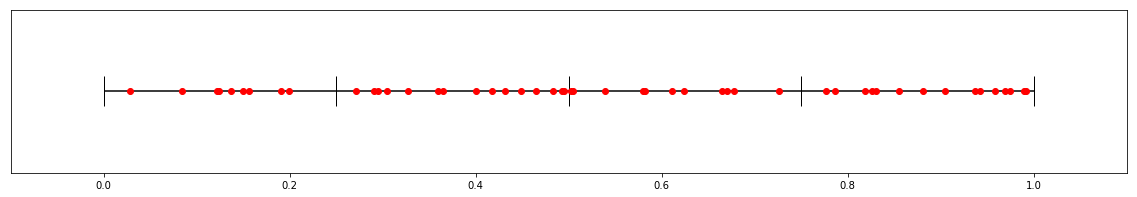

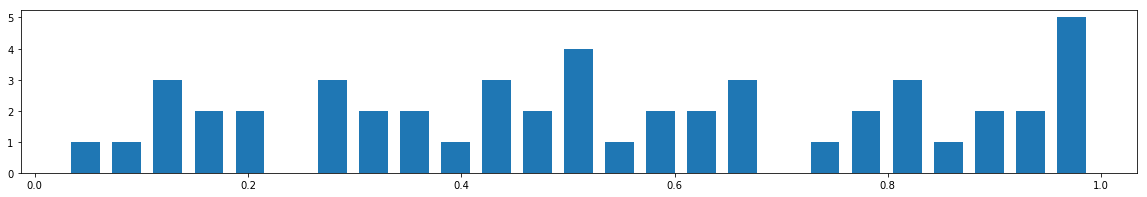

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n=50  # n=100 #n=1000 #n=10000      #change number of drawn examples "n" 
Nums=np.random.rand(n)
#print Nums
a=np.arange(0,1.25,0.25)            # make all 0.25 units a vertical dash
y=np.zeros(a.shape)
fig=plt.figure(figsize=(20,3))
plt.plot(a,y,'k|',ms = 30)          # plot verticale dashes in the Graphic 

plt.hlines(0,0,1)
plt.plot(Nums,np.zeros((n)),'ro')   # plot r=red;   o = big filled Point;   .= small filled Point
plt.xlim(-0.1,1.1)
plt.ylim(-0.5,0.5)
plt.yticks([])                     # no y-Axis Annotations
plt.show()

fig=plt.figure(figsize=(20,3))
hist, bins = np.histogram(Nums, bins=25)         #Number of Intervalls, change "bins" 
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

But measured data is in general much more complex as nature loves to generate complexity based on very simple rules...

### Standard Normal distribution (Gaussian Distribution): 
random numbers with Mean $\mu$ = 0 and Standarddeviation $\sigma$ = 1


The gaussian or normal distribution is one of the most important distributions in science. It was published by **Carl Friedrich Gauss in 1809** "Theoria motus corporum coelestium in sectionibus conicis solem ambientium" (dt.: Theorie der Bewegung der in Kegelschnitten sich um die Sonne bewegenden Himmelskörper)
which defined the **Normal Distribution** just next to the **Least Squares Method** and the **Maximum-Likelihood-Estimation**

It's so called **Probability Desity Function (PDF)** is shown here:

$ P(x|\mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }}exp (-\frac{ (x - \mu )^2}  {2\sigma^2 }  )$

If the data X follows a normal distribution you can write it like this:
$ X \sim \mathcal{N}(\mu,\,\sigma^{2})\,.$

$ X \sim \mathcal{N}(0,1)$ is called the Standard Normal distribution (source: https://de.wikipedia.org/wiki/Normalverteilung)

Numeric Python also offers a function called **np.random.randn()** to generate normally distributed numbers.

Don't mixed it up with **np.random.rand()**, there is an extra **n**!

Try it yourselv and play with the source code below by changing the number **n**...

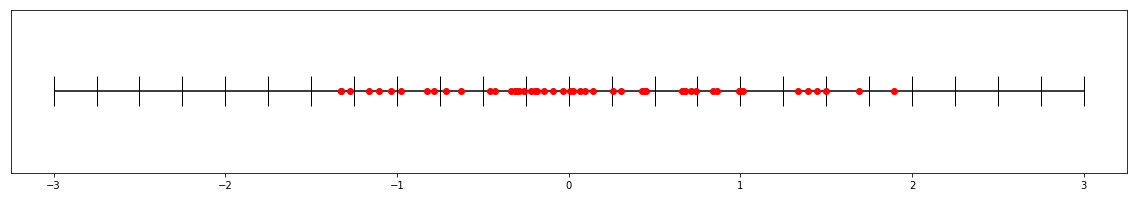

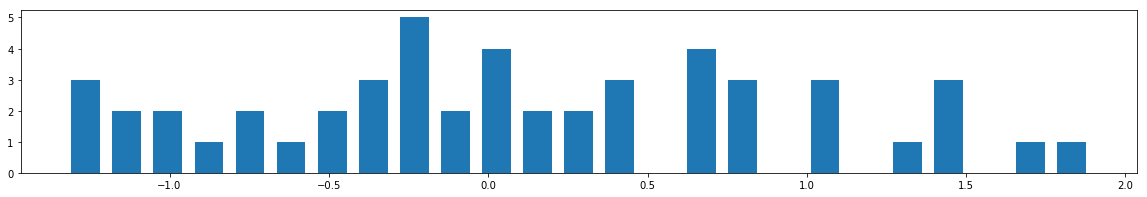

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n=50 # n=100 #n=1000 #n=10000           #change number of drawn examples "n", start with small
Nums=np.random.randn(n)                 # Difference!!! : randn() instead of rand()

a=np.arange(-3,3.25,0.25)
y=np.zeros(a.shape)
fig=plt.figure(figsize=(20,3))
plt.plot(a,y,'k|',ms = 30)

plt.hlines(0,-3,3)
plt.plot(Nums,np.zeros((n)),'ro')
plt.xlim(-3.25,3.25)
plt.ylim(-0.5,0.5)
plt.yticks([])
plt.show()

fig=plt.figure(figsize=(20,3))
hist, bins = np.histogram(Nums, bins=25)          #change number of Intervalls "bins=" 
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Explanation of Graphics of the normal dist:
    

In [4]:
range(-10,11)

range(-10, 11)

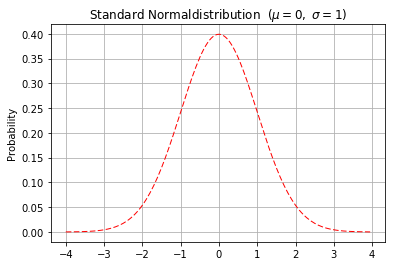

In [5]:
bins=np.arange(-4,4,0.05)

y = mlab.normpdf( bins, 0, 1)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('')
plt.ylabel('Probability')
plt.title(r'Standard Normaldistribution  ($\mu=0,\ \sigma=1$)')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


Graphics of std norm with percentage sign and explanations

The general Probability density function as shown above:
$ P(x|\mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }}exp (-\frac{ (x - \mu )^2}  {2\sigma^2 }  )$

will be much less complex

$ P(x|0, 1) = \frac{1}{{1 \sqrt {2\pi } }}exp (-\frac{ (x - 0 )^2}  {2\cdot1^2 }  )$

If the data X follows a normal distribution you can write it like this:
$ X \sim \mathcal{N}(\mu,\,\sigma^{2})\,.$

$ X \sim \mathcal{N}(0,1)$ is called the Standard Normal distribution (source: https://de.wikipedia.org/wiki/Normalverteilung)

Furthermore there are many more distributions that can be used in numpy, e.g.

 - Bernoulli Dist.
 
 - Poisson Dist.  
 
 - Log-Normal Dist.
 
 - 

https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html#module-scipy.stats 

## A little review of histogramms <a name="hist"> </a>


Histograms are a special view to display data. I have allready used them in the examples of statistical distributions above. Its based on a 2D diagram where the horizontal axis shows each data-value and the vertical axis show the frequency of each value (how often is this value present in the dataset) 

By the review of the histogram you can guess what might be the underlying distribution in the data. You can also determine wheater there is just one or two paeks in the histogram....

For image data contrast can be easily assessed in this way. An image shows a good contrast when all possible values are present or on the other hand a low contrast when only few values are present.

But by a review of the histogram you can not say where a pixel is located in an Image(row/col)

http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

https://plot.ly/matplotlib/histograms/

There are multiple options and software libraries to generate the histogram of a dataset like np, plt or pandas,...but I will only display two of them here...  

...just like before we start with random values and add an offset and multiplier...

pass over the data to the function that calculates the histogram and generate a best fit line for comparison

The number of **bins** (here bins=50) describes the interval in which the data is sampled.

The parameter **normed=1** in plt.hist() ensures a standard curved, this means the area under the curve is always eq. 1

If this parameter is deactivated the best fit line is not over the data in the plot...

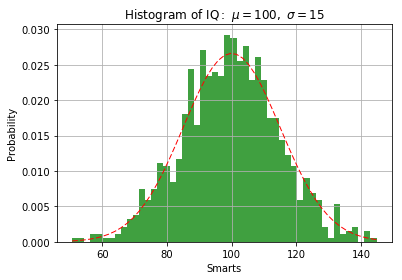

In [6]:
#Histogram mittels Funktion  plt.hist()  aus matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(1000)

                                          # generate the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
#n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)

                                           # add a 'best fit' line, normed=1 has to be set!!!!
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()
#=================================================================================


The second option to draw a histogram is based on plain numeric python **np.histogram()** and uses  less complex parameters...

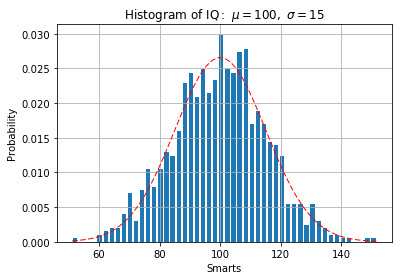

In [7]:
# 2. Option is np.histogram() 
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)

                                        # generate the histogram of the data
hist, bins = np.histogram(x, bins=50, normed=True)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)


# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

choose for you which histigram is best fitting for you and apply it on a dataset of your choice

## Variance and Covariance <a name="var"> </a>

compare the end of the Notebook -01-Basics-of-Python-... there was an example how to calculate 
the standard deviation of a dataseries.

In the following example I will generate **two dataseries** instaed of one and see if I can use the same approach of formulas:

$ std = \sqrt{\frac{\sum\nolimits_{i=1}^{20}(x_i - \bar{X})^2}{20-1}}$  where $\bar{X}$ is the Mean of the dataseries

$ var = std^2 =\frac{\sum\nolimits_{i=1}^{20}(x_i - \bar{X})^2}{20-1}$ ! Remember Variance is only the squared value of the standard-deviation !

$ cov(x_1,x_2) = \frac{\sum\nolimits_{i=1}^{20}((x_{1i} - \bar{X_1})\cdot(x_{2i} - \bar{X_2}) )}{20-1}$  where $\bar{X_1}$ and $\bar{X_2}$ are the Means of the dataseries

compare the formula of the variance and the covariance, there is no squared $(...)^2$ Term in the Covariance instead of two terms $(x_i - \bar{X})$

to format the display of the dataseries aligned just next to each other a **pandas dataframe** can be used. Pandas is a library for easily handling of datasets (see: https://pandas.org ) 


In [8]:
#import pandas as pd
np.random.seed(0)
x1=50+10*np.random.randn(20,1)
x2=30+10*np.random.randn(20,1)   

df=pd.DataFrame(x1,columns=['x1'])
df['x2'] = pd.DataFrame(x2)
df

,x1,x2
0,67.640523,4.470102
1,54.001572,36.536186
2,59.787380,38.644362
3,72.408932,22.578350
4,68.675580,52.697546
5,40.227221,15.456343
6,59.500884,30.457585
7,48.486428,28.128161
8,48.967811,45.327792
9,54.105985,44.693588


**Now Calculate the mean for each dataseries, it's Standard deviation and Variance **

In [9]:
X1mean=np.sum(x1)/20
X2mean=np.sum(x2)/20

print('X1mean: {}'.format(X1mean))
print('X2mean: {}'.format(X2mean))
print('std(x1)={}'.format(np.std(x1,ddof=1)))
print('std(x2)={}'.format(np.std(x2,ddof=1)))

print('var(x1)={}'.format(np.var(x1,ddof=1)))
print('var(x2)={}'.format(np.var(x2,ddof=1)))


X1mean: 55.69334592945635
X2mean: 30.557503534867134
std(x1)=8.722691485249856
std(x2)=12.186782902269126
var(x1)=76.08534674685032
var(x2)=148.5176775070391


Now Calculate the **residuals from the mean to each datapoint ** and add it to the DataFrame

In [10]:
x1Res=x1-X1mean
x2Res=x2-X2mean
x1STD=np.sqrt(np.sum(x1Res**2)/19)
x2STD=np.sqrt(np.sum(x2Res**2)/19)


# add the residuals to the dataframe
df['x1Res'] = pd.DataFrame(x1Res)
df['x2Res'] = pd.DataFrame(x2Res)
# add Means and std's in the last line of the DataFrame
df=pd.concat([df,pd.DataFrame([[X1mean,X2mean,x1STD,x2STD]],columns=['x1','x2','x1Res','x2Res' ])])
df=pd.concat([df,pd.DataFrame([[X1mean,X2mean,np.std(x1,ddof=1),np.std(x2,ddof=1)]],columns=['x1','x2','x1Res','x2Res' ])])
df

,x1,x2,x1Res,x2Res
0,67.640523,4.470102,11.947178,-26.087402
1,54.001572,36.536186,-1.691774,5.978682
2,59.787380,38.644362,4.094034,8.086858
3,72.408932,22.578350,16.715586,-7.979154
4,68.675580,52.697546,12.982234,22.140043
5,40.227221,15.456343,-15.466125,-15.101160
6,59.500884,30.457585,3.807538,-0.099918
7,48.486428,28.128161,-7.206918,-2.429342
8,48.967811,45.327792,-6.725534,14.770289
9,54.105985,44.693588,-1.587361,14.136084


In the last two rows the mean-values of x1 and x2 as well as their std-dev are shown once calculated by hand and once by the numpy function. As we can see the results are equal.

If we calculate the **elementwise product** of column **x1Res** and column **x2Res** from the first **row to 19** and **sum the products up** we have a connection value of the two dataseries.

When this sum is divided by (n-1)=(20-1)=**19** (remember we have 20 meassurements) just like in the formula of the standard deviation the result is called the **Covariance** of the two dataseries. It describes their linear dependency.

In [11]:
print(x1Res*x2Res)
print(20*'-') 
print('Sum: {}'.format(np.sum(x1Res*x2Res)))
print('Cov: {}'.format(np.sum(x1Res*x2Res)/19))
print('std(x1)={}| std(x2)={} '.format(np.std(x1,ddof=1),np.std(x2,ddof=1)))
print('var(x1)={}| var(x2)={} '.format(np.var(x1,ddof=1),np.var(x2,ddof=1)))

[[-311.67081933]
 [ -10.11457855]
 [  33.10787275]
 [-133.37623103]
 [ 287.42721455]
 [ 233.55642844]
 [  -0.38044298]
 [  17.50806887]
 [ -99.33808484]
 [ -22.43906742]
 [  -4.21876242]
 [  28.53150721]
 [ -18.08788259]
 [  91.16796876]
 [   5.06480833]
 [  -2.37070965]
 [ 108.61496844]
 [ -88.80563534]
 [  11.35460092]
 [  50.96636489]]
--------------------
Sum: 176.4975890111599
Cov: 9.289346790061048
std(x1)=8.722691485249856| std(x2)=12.186782902269126 
var(x1)=76.08534674685032| var(x2)=148.5176775070391 


Compare the Value of the calculated Covariance with the output of the build-in numpy fuction **np.cov()**

keep in mind that the numpy arrays x1 and x2 must be transposed to calculate the inner-Matrixproduct, for details see the documentation of numpy.cov(): https://numpy.cov

In [13]:
np.cov(x1.T,x2.T)

array([[  76.08534675,    9.28934679],
       [   9.28934679,  148.51767751]])

**numpy.cov()** calcultes the so called Covariance matrix which displays the **Variances on the main diagonal** and the **Covariance on the second diagonal**

To display the Variance Covariance Matrix like this the packadge tabulate is needed (pip3 install tabulate) 

In [14]:
from tabulate import tabulate
headers = ["x1", "x2"]
CorrM=np.cov(x1.T,x2.T)

# tabulate data
table = tabulate(CorrM, headers, tablefmt="fancy_grid")

# output
print(table)

╒══════════╤═══════════╕
│       x1 │        x2 │
╞══════════╪═══════════╡
│ 76.0853  │   9.28935 │
├──────────┼───────────┤
│  9.28935 │ 148.518   │
╘══════════╧═══════════╛


## Analysing Correlations <a name="corr"> </a>

The next step after you understood the relation between Variance and Covariance is the Correlation.

Correlation is widely used in statistics to assess the **dependencies of dataseries**. In the following examples three different coefficients are show and compared to display the ...

The basisc assumption is here that only **linear dependencies** are in the data.

Pearson: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Spearman or Kendall: https://de.wikipedia.org/wiki/Rangkorrelationskoeffizient  

**Pearson's Correlation**


The idea of the correlation coefficient $\rho(x_1,x_2) = \frac{\text{cov}(x_1,x_2)}{\sigma_{x1} \sigma_{x2}}$ was introduced by Auguste Bravis 1880 and later on in 1895 by **Karl Pearson**. Today it's widely known as **Pearsons Correlation**. 

It is closely related to the calculation of the variance and the covariance as shown above, compare the given formulas and try the source code below yourself:

generate different random numbers by activating the commented lines
**np.random.seed(0)** must stay in comment because this line is making the seed for the random process permanent

                
Create normal distributed data : 
x1: [ 67.64052346  54.00157208  59.78737984  72.40893199  68.6755799
  40.2272212   59.50088418  48.48642792  48.96781148  54.10598502
  51.44043571  64.54273507  57.61037725  51.21675016  54.43863233
  53.33674327  64.94079073  47.94841736  53.13067702  41.45904261]
-----------------
x2: [  4.47010184  36.53618595  38.64436199  22.5783498   52.69754624
  15.45634325  30.45758517  28.1281615   45.32779214  44.6935877
  31.54947426  33.7816252   21.12214252  10.19203532  26.52087851
  31.56348969  42.30290681  42.02379849  26.12673183  26.97697249]


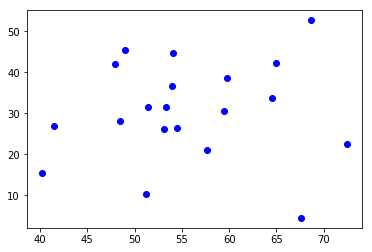

Correlationsmatrix (Pearson): 
                
[[ 1.          0.08738675]
 [ 0.08738675  1.        ]]
___________________________________
                
 Pearsons Correlation Coefficient: 0.08738675035810144


In [69]:
# Pearson Correlation Coef
# scipy.stats.spearmanr()    # Spearman Correlation Coef
print('                ')
print('Create normal distributed data : ')
#np.random.seed(0)
#x1=np.random.randn(20,1)      # generate 20 random numbers for x1 and x2
#x2=np.random.randn(20,1)

print('x1:', np.ravel(x1) )    # np.ravel() macht z.B. aus einem 2x2 array eine 1x4 Liste...
print( '-----------------')
print('x2:', np.ravel(x2))

plt.plot(x1,x2,'bo')         # plotten b=blau   o=großer ausgefüllter Punkt   .= kleiner ausgefüllter Punkt
#plt.xlim(-3,25)          #Anzeigebereich festlegen
#plt.ylim(-3,25)
plt.show()

print( 'Correlationsmatrix (Pearson): ')
print('                ')
print( np.corrcoef(np.ravel(x1),np.ravel(x2) ) )  # np.corrcoef() erzeugt eine 2x2 Korrelationsmatrix Element 1,2 ist der gewünschte Korrelationskoeffizient 
print( '___________________________________')
print( '                ')
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]   # Python fängt bei 0 an zu zählen 
print(' Pearsons Correlation Coefficient: {}'.format(pr))


The correlation matrix shown above has the same structure as the covariance matrix used before. 
The only difference is that main diagonal is **"besetzt"** with **'1'** and on the **nebendiagonale** you can find the pearson correlation coefficient.

### Compare the Correlations of Pearson, Spearman and Kendall in one example

                
generate Normalverteilte Data: 
x1: [ 67.64052346  54.00157208  59.78737984  72.40893199  68.6755799
  40.2272212   59.50088418  48.48642792  48.96781148  54.10598502
  51.44043571  64.54273507  57.61037725  51.21675016  54.43863233
  53.33674327  64.94079073  47.94841736  53.13067702  41.45904261]
-----------------
x2: [  4.47010184  36.53618595  38.64436199  22.5783498   52.69754624
  15.45634325  30.45758517  28.1281615   45.32779214  44.6935877
  31.54947426  33.7816252   21.12214252  10.19203532  26.52087851
  31.56348969  42.30290681  42.02379849  26.12673183  26.97697249]


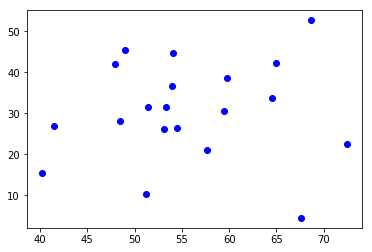

Correlationsmatrix (Pearson): 
                
[[ 1.          0.08738675]
 [ 0.08738675  1.        ]]
___________________________________
                
 Pearsons Correlation: 0.08738675035810144
Spearmans Correlation: 0.10827067669172932
  Kendall Correlation: 0.11578947368421053
_____________________________________
                


In [70]:
print( '                ')
print( 'generate Normalverteilte Data: ')
#np.random.seed(0)
#x1=np.random.randn(20,1)
#x2=np.random.randn(20,1)

print( 'x1:', np.ravel(x1))
print( '-----------------')
print( 'x2:', np.ravel(x2))

plt.plot(x1,x2,'bo')
#plt.xlim(-3,5)
#plt.ylim(-3,5)
plt.show()
print( 'Correlationsmatrix (Pearson): ')
print('                ')
print( np.corrcoef(np.ravel(x1),np.ravel(x2) ))
print( '___________________________________')
print( '                ')
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]
print( ' Pearsons Correlation: {}'.format(pr))

sr,sp = stats.spearmanr(x1,x2)

print( 'Spearmans Correlation: {}'.format(sr))

kr,kp = stats.kendalltau(x1,x2)

print( '  Kendall Correlation: {}'.format(kr))
print( '_____________________________________')
print( '                ')

Adding a Datapoint (Outliner/Blunder/gross error) to the data series

                
                
_____________________________________
                
insert false datapoint (Outliner) at position 10 in the set:
x1[10] = -150
x2[10] = -150 
calculate Correlationmatrix (Pearson) again: 
                
[[ 1.          0.94563584]
 [ 0.94563584  1.        ]]
                
 Pearson's Correlation: 0.9456358372825819 !!!! 1 wrong Point, totally different result than before!
_____________________________________


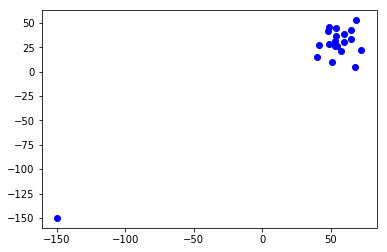

!!!But:                
_____________________________________
                
  Spearman's Correlation: 0.23308270676691725
  Kendall's Correlation: 0.19999999999999998


In [71]:
print( '                ')
print( '                ')
print( '_____________________________________')
print( '                ')
print( 'insert false datapoint (Outliner) at position 10 in the set:')
      
print( 'x1[10] = -150')
print( 'x2[10] = -150 ')
x1[10]=-150
x2[10]=-150

print( 'calculate Correlationmatrix (Pearson) again: ')
print( '                ')
print(np.corrcoef(np.ravel(x1),np.ravel(x2) ))
pr =np.corrcoef(np.ravel(x1),np.ravel(x2) )[0,1]
print( '                ')
print( " Pearson's Correlation: {}".format(pr), '!!!! 1 wrong Point, totally different result than before!')
print( '_____________________________________')

plt.plot(x1,x2,'bo')
#plt.xlim(-3,20)
#plt.ylim(-3,20)
plt.show()
print( '!!!But:                ')
print( '_____________________________________')
print ('                ')
sr,sp= stats.spearmanr(x1,x2)
print ("  Spearman's Correlation: {}".format(sr))
kr,kp = stats.kendalltau(x1,x2)
print( "  Kendall's Correlation: {}".format(kr))

The Correlation calculated by the Pearson coefficient is missleading and showing a high linear 
dependency of the data, just because there is one false datapoint in the set.

Spearman's and Kendall's coefficients are more robuts against gross errors.


**Therefor keep in mind never to rely on only one of the coefficents...**

**Check the dataseries for consistency and eleminate gross errors.**

**Take care of the measuring system to find systematic errors.**

The following very simple techniques allow to find gross errors in a dataset. Try to apply these test always before you work with a dataset...

## Jack-Knife Techniques <a name="jack"> </a>

https://de.wikipedia.org/wiki/Jackknife_%28Statistik%29

of a Correlations coefficient and display of the histogram

Imagine you have a simple set of data and one gross error in it...

In [72]:
import numpy as np
x=np.array([3.12,0,1.57,19.67,0.22,2.20])
for i in x: print(i)

3.12
0.0
1.57
19.67
0.22
2.2


Obviously the **gross error is 19.67** as it does not fit in the set. With a small dataset like this the error can be easily found but in a large one you need an automatic technique to find it.

The consequenses of the error in the set can be reviewd by calculating the mean.  

In [73]:
print('Mean(x |with error):     {}'.format(np.mean(x)))
print('Mean(x |without error ): {}'.format(np.mean(np.delete(x,3))))

Mean(x |with error):     4.463333333333334
Mean(x |without error ): 1.4220000000000002


you can see the Mean value is directly affected by a gross error. **np.delete()** is used here to delete the 3rd point from the array

How can such an error be found automaticly??

**Think about the following idea:** 

Just delete the first data point in the list and calculate the mean value again with (n-1) datapoints.

Than put the first datapoint back to the list and now delete the second datapoint and calculate 
the mean again. Continue this procedure until all datapoints were ones deleted from the set and 
observe if the Mean value changes.


we can do this with a loop in a single line: 

In [74]:
for i in range(x.shape[0]) : print('Mean(x without point {}): {}'.format(i,np.mean(np.delete(x,i))))

Mean(x without point 0): 4.732
Mean(x without point 1): 5.356
Mean(x without point 2): 5.042
Mean(x without point 3): 1.4220000000000002
Mean(x without point 4): 5.312
Mean(x without point 5): 4.916


you can obseve a **change in the mean Value** when the **blunder was deleted** from the list,  

**Now apply Jack Knife to the correlation from above**

You can use the Jack-Knife technique in the same way to check a bunch of **n** measurements with the pearson correlation (compare above) and you don't know if there is a blunder in the data...

Just delete the first data point in the list and calculate the pearson correlation again with (n-1) datapoints.

Than put the first datapoint back to the list and now delete the second datapoint and calculate the pearson correlation. Continue this procedure until all datapoints were ones deleted from the set and observe if the pearson correlation changes.

Assuming that there is just one false point in the data, you will definitly find the gross error.

Try it yourself below:


...löschen von Punkt 0 --> r =   0.96641186748
...löschen von Punkt 1 --> r =   0.946281888588
...löschen von Punkt 2 --> r =   0.945554010823
...löschen von Punkt 3 --> r =   0.953501899572
...löschen von Punkt 4 --> r =   0.946201623482
...löschen von Punkt 5 --> r =   0.945606449518
...löschen von Punkt 6 --> r =   0.945628260979
...löschen von Punkt 7 --> r =   0.945851224087
...löschen von Punkt 8 --> r =   0.952005890629
...löschen von Punkt 9 --> r =   0.948969770609
...löschen von Punkt 10 --> r =   0.0901978413034
...löschen von Punkt 11 --> r =   0.94561201899
...löschen von Punkt 12 --> r =   0.947478174978
...löschen von Punkt 13 --> r =   0.949669368754
...löschen von Punkt 14 --> r =   0.945691690964
...löschen von Punkt 15 --> r =   0.945662960455
...löschen von Punkt 16 --> r =   0.945193570817
...löschen von Punkt 17 --> r =   0.950632540834
...löschen von Punkt 18 --> r =   0.945648366808
...löschen von Punkt 19 --> r =   0.94693046478
___________________________
   


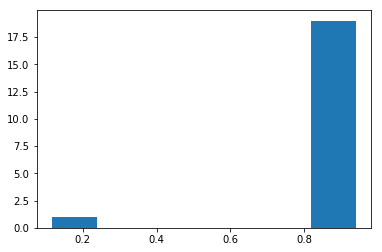

In [75]:
CorrArr=[]
for i in range(0,len(x1)):
    xjk=[]
    yjk=[]
    xjk=np.delete(x1,i)                  # i-ten Punkt löschen und mit dem Rest die Korrelation berechnen
    yjk=np.delete(x2,i)
    CorrArr.append(np.corrcoef(xjk,yjk)[0,1])
    print( '...löschen von Punkt', i , '--> r =  ' ,np.corrcoef(xjk,yjk)[0,1])

#http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html

print('___________________________')
print('   ')
print( 'Index of Outliner: {}'.format(np.where(CorrArr==np.min(CorrArr))[0] ))
print( 'Correlation without Outliner: {}'.format(np.min(CorrArr)))
print( '  ')
print( '  ')
print( 'Histogram of Jack-Knife Coorelation Coefficients')
hist, bins = np.histogram(CorrArr, bins=5)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

## Bootstrapping techniques <a name="bootstrapp"> </a>

beside the Jack-Knife method there are several other that can be used in the same way to localize blunders in datasets

**Bootstrapping** is one of them and is based on the idea of choosing datapoints randomly from the set.

e.g. we have the same set x as before with the known blunder at index 3


In [76]:
x=np.array([3.12,0,1.57,19.67,0.22,2.20])
for i in x: print(i)

3.12
0.0
1.57
19.67
0.22
2.2


you can pik random datapoints from the list with the function **np.random.choice()**

In [77]:
np.random.choice(x, 6)

array([ 19.67,   2.2 ,   0.22,   0.  ,   1.57,   0.22])

everytime you apply the function the specified number of samples is drawn from the dataset. Some points are piked double which is allowed and wanted.

The idea is now to apply this random choice several times (e.g. 1000x) and to calculate the mean value with the drawn points. Then we obseve the histogram of the calculated Mean. 

Every time the blunder is drawn the calculated Mean value is affected, but everytime the set is free of the blunder the mean value will be lower. This is what we can observe in the histogram...

https://de.wikipedia.org/wiki/Bootstrapping_%28Statistik%29

<img src='figures/Bootstrapp_Example2.png'>

In [78]:
MeanOfX=np.zeros(1000)
for i in range(0,1000) : MeanOfX[i]=np.mean(np.random.choice(x, 6)) 

In [79]:
print(MeanOfX[0:10])

[  6.70333333   4.17         1.98666667   4.685        4.725        1.77666667
   7.86166667  10.35833333   7.11666667   3.83833333]


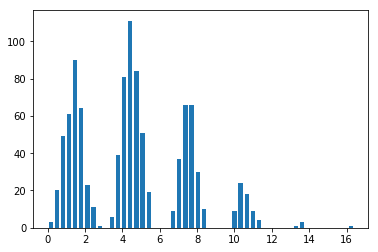

In [80]:
hist, bins = np.histogram(MeanOfX, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

### Bootstrapping Estimation of a  Correlations coefficient and display in a histogram

Mean: 0.002363991314234709
std: 0.22825737841248153
Histogram of Bootstrap Estimation of Correlation


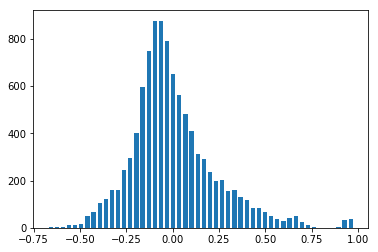

In [81]:
CorrArr2=[]
for i in range(0,10000):           # range(0,100)  range(0,1000)   range(0,10000)
    
    x1bs=[]
    x2bs=[]
    x1bs =  np.random.choice(np.ravel(x1),20, replace=True)
    x2bs =  np.random.choice(np.ravel(x2),20, replace=True)
    
    CorrArr2.append(np.corrcoef(x1bs,x2bs)[0,1])

#print len(CorrArr2) 
print( 'Mean: {}'.format(np.mean(CorrArr2)))
print( 'std: {}'.format(np.std(CorrArr2)))

print('Histogram of Bootstrap Estimation of Correlation')
hist, bins = np.histogram(CorrArr2, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

### Bootstrapping - Schätzung für Regressionsanalyses

http://nbviewer.jupyter.org/gist/aflaxman/6871948  | http://people.duke.edu/~ccc14/pcfb/analysis.html

Untersuchung der linearen Funktion: $ y=6.3 \cdot x + 15            $

Untersuchung der quadratischen Funktion: $yq=3 \cdot x^2 + 4 \cdot x + 7$

In [82]:
import pandas as pd
from matplotlib.pyplot import *
np.random.seed(0)
x=10*np.random.rand(20,1)   # uniform distributed samples zwischen [0,10]

y=6.3*x+15

yq = 3*x*x + 4*x + 7

y=y+5*np.random.randn(20,1)

yq=yq+5*np.random.randn(20,1)
#print x,y

xyData3 = pd.DataFrame(x)                    # PANDAS Dataframe Spalten mit den zufälligen Werten x,y belegen
xyData3['1'] = pd.DataFrame(y)
#print xyData3
x=np.ravel(x)
y=np.ravel(y)

### Schätzung der Funktion durch eine Regressionsanalyse (Polynomial-Fit)

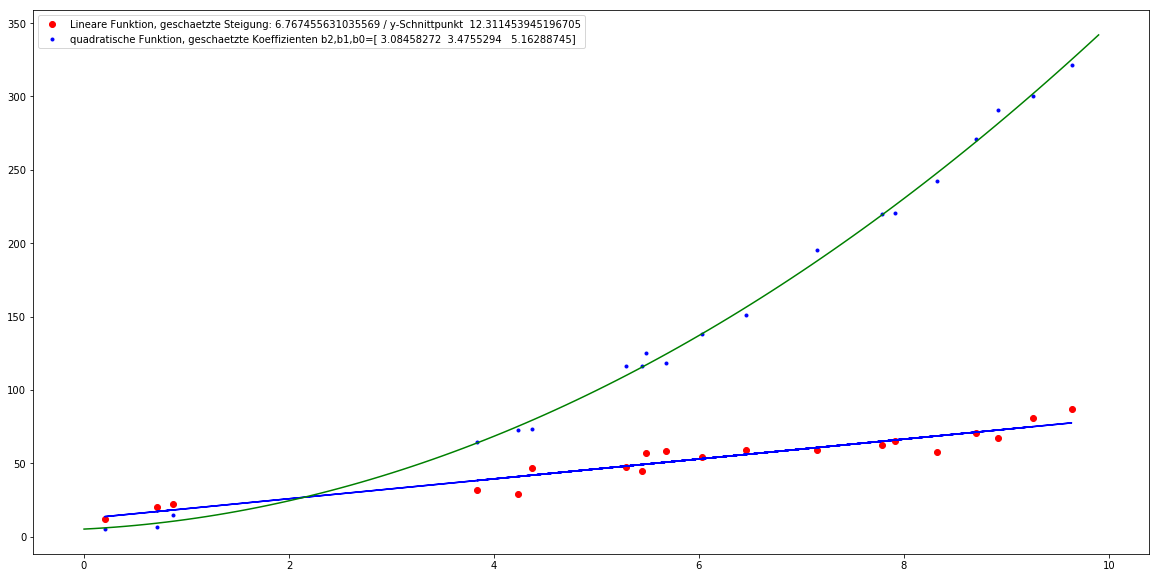

In [83]:
#http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html
m,b=np.polyfit(x,y,1)

coefficients=np.polyfit(x,yq,2)   
#print coefficients
polynomial = np.poly1d(np.ravel(coefficients))
xs = np.arange(0, 10, 0.1)
ys = polynomial(xs)

#print ' Steigung: {} / y-Schnittpunkt  {}'.format(m,b)
#print b0,b1,b2
#plotten der verteilungen
plt.figure(figsize=(20,10))
plt.plot(x,y,'ro', label='Lineare Funktion, geschaetzte Steigung: {} / y-Schnittpunkt  {}'.format(m,b))
plt.plot(x,yq,'b.',label='quadratische Funktion, geschaetzte Koeffizienten b2,b1,b0={} '.format(np.ravel(coefficients)))
# plotten der Regressionsgeraden darüber
plt.plot(x,m*x+b,'b')

plt.legend()
plt.plot(xs,ys,'g')
plt.show()


In [84]:

marr=[]
barr=[]

#zufällige Ziehung von Daten kann unterschiedlich erreicht werden... am besten mal ausprobieren
# xbs=np.random.choice(np.ravel(x),20, replace=True)
# ybs=np.random.choice(np.ravel(y),20, replace=True)      # Über np.random()

# data1 = xyData3.sample(20,replace=True)                 # Über pd.sample()  PANDAS Dataframe 

for i in range(0,1000):
    data1=[]
    xbs=[]
    ybs=[]
    data1 = xyData3.sample(20,replace=True)    #ziehen von 20 Werte-Paaren aus dem Pandas Datenrahmen 
    xbs=np.ravel(data1[0])
    ybs=np.ravel(data1[1])
    mbs=0
    bbs=0
    #punktpaar müssen zusammen gezogen werden, nicht x,y Zuordnung mixen 
    mbs,bbs = np.polyfit(xbs,ybs,1)
    marr.append(mbs)
    barr.append(bbs)
print ' Mean: Steigung: {} /Mean: y-Schnittpunkt  {}'.format(np.mean(marr),np.mean(barr))
print ' Std: Steigung   {} /Std:  y-Schnittpunkt  {}'.format(np.std(marr),np.std(barr))
print '      '
print ' Wahre Werte: y=6.3*x+15 (siehe oben)'

#schleife über i...1000 durchläufe
    # random.choice()  mit zurücklegen über die Daten x,y
    # m[i],b[i] = np.polyfit(xbs,ybs,1)
    #
#mean m,b berechnen 
#var m,b berechnen
#histogramm m
#histogramm b

plt.plot(x,y,'ro')
plt.plot(x,m*x+b,'b')
plt.plot(x,np.mean(marr)*x + np.mean(barr),'g')
plt.plot(x,np.mean(marr)*x + np.mean(barr)+ 2*np.std(barr),'b--')
plt.plot(x,np.mean(marr)*x + np.mean(barr)- 2*np.std(barr),'b--')
#plotten der verteilungen

# plotten der Regressionsgeraden darüber
plt.show()


SyntaxError: invalid syntax (<ipython-input-84-ed15ca8c2ddd>, line 24)

In [ ]:
print 'Histogram Bootstrap Steigungs-Paramter'
hist, bins = np.histogram(marr, bins=15)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print ' Mean(Steigung) :  {} '.format(np.mean(marr))
print '  Std(Steigung) : ±{} '.format(np.std(marr))
print '      '
print ' Wahre Werte: m = 6.3'


In [ ]:
print 'Histogram Bootstrap y-Schnittpunkt'
hist, bins = np.histogram(barr, bins=15)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print ' Mean(y-Schnitt) :  {} '.format(np.mean(barr))
print '  Std(y-Schnitt) : ±{} '.format(np.std(barr))
print '      '
print ' Wahre Werte: n = 15'


%%latex 
\usepackage{pgfplots}
\usepackage{amssymb, amsmath}
\usepackage{tikz}
\usepackage{xcolor}
\pgfplotsset{compat=1.7}
\begin{document}
\pgfmathdeclarefunction{gauss}{2}{\pgfmathparse{1/(#2*sqrt(2*pi))*exp(-((x-#1)^2)/(2*#2^2))}%
}
\begin{tikzpicture}
\begin{axis}[no markers, domain=0:10, samples=100,
axis lines*=left, xlabel=Standard deviations, ylabel=Frequency,,
height=6cm, width=10cm,
xtick={-3, -2, -1, 0, 1, 2, 3}, ytick=\empty,
enlargelimits=false, clip=false, axis on top,
grid = major]
\addplot [fill=cyan!20, draw=none, domain=-3:3] {gauss(0,1)} \closedcycle;
\addplot [fill=orange!20, draw=none, domain=-3:-2] {gauss(0,1)} \closedcycle;
\addplot [fill=orange!20, draw=none, domain=2:3] {gauss(0,1)} \closedcycle;
\addplot [fill=blue!20, draw=none, domain=-2:-1] {gauss(0,1)} \closedcycle;
\addplot [fill=blue!20, draw=none, domain=1:2] {gauss(0,1)} \closedcycle;
\addplot[] coordinates {(-1,0.4) (1,0.4)};
\addplot[] coordinates {(-2,0.3) (2,0.3)};
\addplot[] coordinates {(-3,0.2) (3,0.2)};
\node[coordinate, pin={68.2\%}] at (axis cs: 0, 0.4){};
\node[coordinate, pin={95\%}] at (axis cs: 0, 0.3){};
\node[coordinate, pin={99.7\%}] at (axis cs: 0, 0.2){};
\node[coordinate, pin={34.1\%}] at (axis cs: -0.5, 0){};
\node[coordinate, pin={34.1\%}] at (axis cs: 0.5, 0){};
\node[coordinate, pin={13.6\%}] at (axis cs: 1.5, 0){};
\node[coordinate, pin={13.6\%}] at (axis cs: -1.5, 0){};
\node[coordinate, pin={2.1\%}] at (axis cs: 2.5, 0){};
\node[coordinate, pin={2.1\%}] at (axis cs: -2.5, 0){};
\end{axis}
\end{tikzpicture}
\end{document}

## Testing Theory in Statistics <a name="testing"> </a>

### Kolmogorow-Smirnow Test (KS-Test)

There are also many ways to test a dataset if it is normally distributed. The KS-Test is only one Option

In [ ]:
from scipy import stats

In [ ]:
stats.kstest(Nums, 'norm')